In [47]:
!pip install plotly

  Using cached plotly-5.4.0-py2.py3-none-any.whl (25.3 MB)
  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)


In [98]:
##Run all the scripts

# %run ../Pyscripts/MT_SE_PT_Preprocess.py
# %run ../Pyscripts/MT_SE_PT_Visusalisation.py
# %run ../Pyscripts/MT_SE_PT_Turbine_Funtions.py
%run ../Pyscripts/MT_SE_PT_CombineDF_preprocess.py
# %run ../Pyscripts/MT_SE_PT_Funtions.py
# %run ../Pyscripts/MT_SE_PT_Heatmap.py
# %run ../Pyscripts/MT_SE_PT_Tuner.py
%run ../Pyscripts/MT_SE_PT_CombineDF_Model.py
%run ../Pyscripts/MT_SE_PT_CombineDF_Heatmaps.py


In [14]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir('../Data to train') if isfile(join('../Data to train', f))]

In [16]:
onlyfiles

['Gazli-1_750_20210629_flamedetector_data(T6 and T7).xlsx',
 'Gazli-2_750_20210618_UnbalancedDataset.xlsx',
 'SGT-750, CastbergSpare_2021112_Provskott-2.xlsx',
 'SGT-750, Chimei-1_20210902_Provskott-1.xlsx',
 'SGT-750, Chimei-1_20210903_Provskott-2.xlsx',
 'SGT-750, Chimei-1_20210906_Kundprov.xlsx',
 'SGT-750, Gazli-1_20210617_Provskott.xlsx',
 'SGT-750, Gazli-1_20210618_Kundprov.xlsx',
 'SGT-750, Gazli-2_20210629_Provskott-1.xlsx',
 'SGT-750, Gazli-2_20210629_Provskott-1_MoreVariables.xlsx',
 'SGT-750, Gazli-2_20210630_Provskott-2.xlsx',
 'SGT-750, Gazli-2_20210701_Provskott-3.xlsx',
 'SGT-750, Gazli-2_20210705_Kundprov.xlsx',
 'SGT-750, Pipestone_20200528_Kundprov.xlsx',
 'SGT-750, Pipestone_20200529_Provskott.xlsx',
 'SGT-750, Pipestone_20200601_Startprover.xlsx',
 'SGT-750, Pipestone_20200605_Förbränningsverifering.xlsx']

In [4]:
# ###Unbalanced Dataset

# ##Data from Gazli20210618Unbalanced
# DS = []
# count = 1
# with warnings.catch_warnings(record=True):
#     warnings.simplefilter("always")
#     File  = pd.read_excel(f'C:/Users/z004csar/Desktop/Thesis_Project/Data to train/SGT-750, Chimei-1_20210906_Kundprov.xlsx',engine="openpyxl",index_col=0)
        

In [19]:
DS = []
for i in onlyfiles:
    DS.append(preprocess_combineburner_TP_sans_SP(pd.read_excel(f'../Data to train/{i}',engine="openpyxl",index_col=0)))
        

C:\Users\z004csar\Anaconda3\envs\tensor\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\z004csar\Anaconda3\envs\tensor\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


No na values


C:\Users\z004csar\Anaconda3\envs\tensor\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


No na values
No na values
No na values
No na values
No na values


C:\Users\z004csar\Anaconda3\envs\tensor\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\z004csar\Anaconda3\envs\tensor\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


No na values


C:\Users\z004csar\Anaconda3\envs\tensor\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


No na values


C:\Users\z004csar\Anaconda3\envs\tensor\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\z004csar\Anaconda3\envs\tensor\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\z004csar\Anaconda3\envs\tensor\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [20]:
stackdf = pd.concat(DS).reset_index(drop=True)

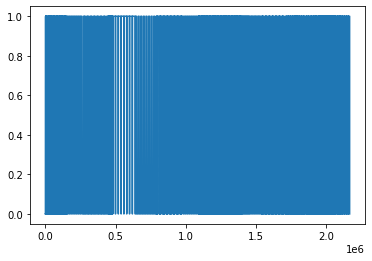

In [21]:
plt.plot(stackdf['BurnerStatus'])

In [ ]:
# # Set up the matplotlib plot configuration
# #
# f, ax = plt.subplots(figsize=(12, 10))
# #
# # Generate a mask for upper traingle
# #
# mask = np.triu(np.ones_like(corr, dtype=bool))
# #
# # Configure a custom diverging colormap
# #
# cmap = sns.diverging_palette(230, 20, as_cmap=True)
# #
# # Draw the heatmap
# #
# sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

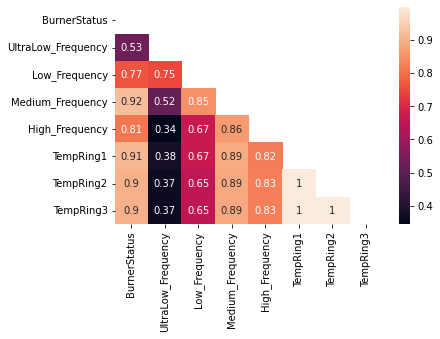

In [61]:
heatmap_burner(stackdf)

In [28]:
import tensorflow as tf
import pandas
# import tensorflow as tf
# from tensorflow.python.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

ImportError: cannot import name 'CategoryEncoding'

In [9]:
from tensorflow.python.keras.models import Sequential

In [30]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
# from tensorflow.keras.layers import CategoryEncoding
scaler = MinMaxScaler()
scaler2 = StandardScaler()

ImportError: cannot import name 'CategoryEncoding'

In [36]:
from tensorflow.keras.models import model_from_json

In [25]:
from sklearn import preprocessing
X = stackdf.iloc[:,1:].astype('float32')
y = stackdf.iloc[:,0].astype('category')
y = preprocessing.LabelEncoder().fit_transform(y)

In [26]:
##train test split for the x and y 
seed = 23
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [33]:
def create_baseline():
    nnmodel = Sequential()
    nnmodel.add(Dense(8, input_dim=7, activation='relu'))
#     nnmodel.add(CategoryEncoding(num_tokens=8, output_mode="multi_hot"))
    nnmodel.add(BatchNormalization())
    nnmodel.add(Dense(units=128, activation='relu'))
    nnmodel.add(Dense(1, activation='sigmoid'))
    # compile the keras model
    nnmodel.compile(loss='binary_crossentropy', optimizer='adam')
    return(nnmodel)

nnmodel=create_baseline()

In [34]:
%time
nnmodel.fit(X_train,y_train,epochs = 25,verbose =1,batch_size = 10)

Wall time: 0 ns
Train on 1517185 samples
Epoch 1/25
1517185/1517185 [==============================] - 394s 260us/sample - loss: 0.0330
Epoch 2/25
1517185/1517185 [==============================] - 391s 258us/sample - loss: 0.0269
Epoch 3/25
1517185/1517185 [==============================] - 18567s 12ms/sample - loss: 0.0258
Epoch 4/25
1517185/1517185 [==============================] - 374s 247us/sample - loss: 0.0251
Epoch 5/25
1517185/1517185 [==============================] - 6296s 4ms/sample - loss: 0.0252
Epoch 6/25
1517185/1517185 [==============================] - 335s 221us/sample - loss: 0.0237
Epoch 7/25
1517185/1517185 [==============================] - 386s 254us/sample - loss: 0.0227
Epoch 8/25
1517185/1517185 [==============================] - 1828s 1ms/sample - loss: 0.0219
Epoch 9/25
1517185/1517185 [==============================] - 360s 237us/sample - loss: 0.0219
Epoch 10/25
1517185/1517185 [==============================] - 363s 239us/sample - loss: 0.0213
Epoch 11/

In [38]:
## Saving a model

model_json = nnmodel.to_json()
with open("nnmodel.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
nnmodel.save_weights("nnmodel.h5")
print("Saved model to disk")

Saved model to disk


In [39]:
## Reading a model from disk

# load json and create model
json_file = open('nnmodel.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("nnmodel.h5")
print("Loaded model from disk")

Loaded model from disk


In [40]:
## evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 99.81%


In [58]:
nnmodel.predict_classes(X_test)

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [1]])

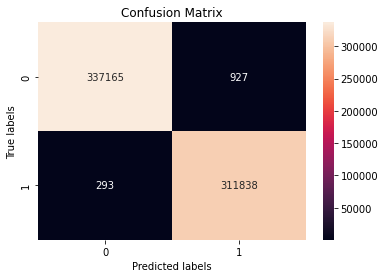

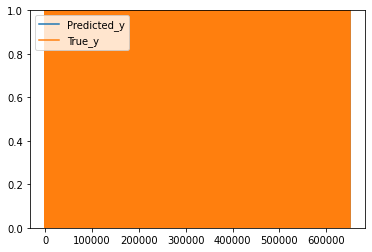

FN : 293 
FP : 927 
TN : 337165 
TP : 311838
Wall time: 46.2 s


In [60]:

%%time
ConfusionmatrixTrainHighTestLow  = {
    "NN": XYconfumatrixCDF_NN(X_test,y_test,nnmodel)
}

## Logistic Regression

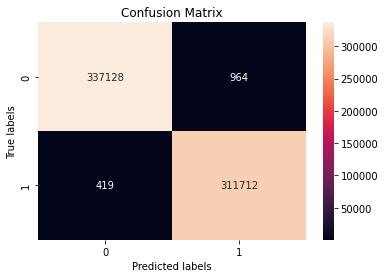

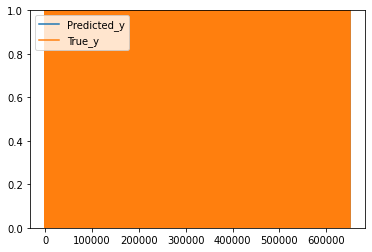

FN : 419 
FP : 964 
TN : 337128 
TP : 311712
Wall time: 9.74 s


(array([[337128,    964],
        [   419, 311712]], dtype=int64),
 337128,
 964,
 419,
 311712)

In [71]:
%%time
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver='liblinear', random_state=21,penalty = 'l2',max_iter=249)#,multi_class = 'multinomial', max_iter = 1000)

# turbine_model_eval(X,y,log_model)x
XYconfumatrixCDF_ALLModels(X_train, X_test, y_train, y_test,log_model)

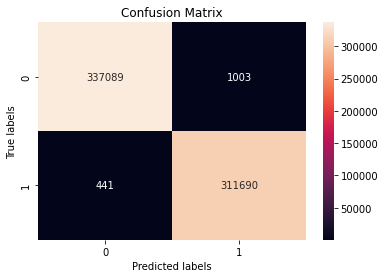

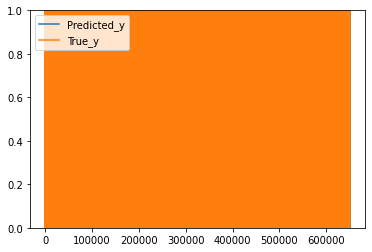

FN : 441 
FP : 1003 
TN : 337089 
TP : 311690


(array([[337089,   1003],
        [   441, 311690]], dtype=int64),
 337089,
 1003,
 441,
 311690)

In [81]:
# turbine_model_eval(X,y,log_model)
XYconfumatrixCDF_ALLModels(X_train, X_test, y_train, y_test,log_model,S = True)

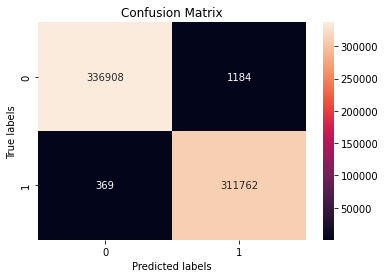

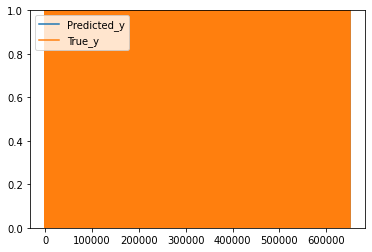

FN : 369 
FP : 1184 
TN : 336908 
TP : 311762


(array([[336908,   1184],
        [   369, 311762]], dtype=int64),
 336908,
 1184,
 369,
 311762)

In [80]:
# turbine_model_eval(X,y,log_model)
XYconfumatrixCDF_ALLModels(X_train, X_test, y_train, y_test,log_model,S = True,MS = 'Minmax')

## RandomForest

In [73]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(max_depth=2, random_state=0)

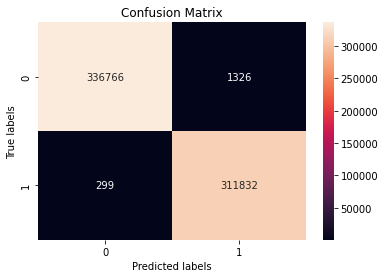

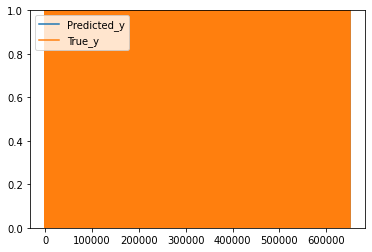

FN : 299 
FP : 1326 
TN : 336766 
TP : 311832


(array([[336766,   1326],
        [   299, 311832]], dtype=int64),
 336766,
 1326,
 299,
 311832)

In [74]:
# turbine_model_eval(X,y,log_model)
XYconfumatrixCDF_ALLModels(X_train, X_test, y_train, y_test,rfclf)

## XGBoost



In [82]:
%%time
import xgboost as xgb
xgbmodel = xgb.XGBClassifier()

Wall time: 1e+03 µs


In [95]:
XYXGBoost_testing(X_train, X_test, y_train, y_test,xgbmodel)

C:\Users\z004csar\Anaconda3\envs\tensor\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[16:08:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

The score using XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) after training on Data1 and testin

C:\Users\z004csar\Anaconda3\envs\tensor\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[16:20:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


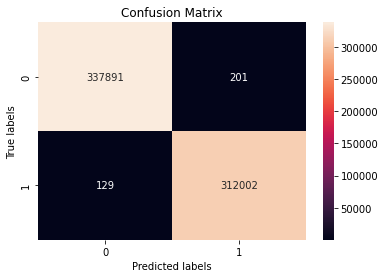

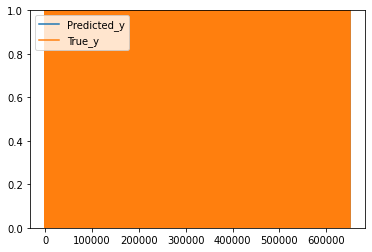

FN : 129 
FP : 201 
TN : 337891 
TP : 312002


(array([[337891,    201],
        [   129, 312002]], dtype=int64),
 337891,
 201,
 129,
 312002)

In [99]:
# turbine_model_eval(X,y,log_model)
XYXGBoost_confumatrix(X_train, X_test, y_train, y_test,xgbmodel)